### Stochastic DTFE implementation in python


Test point in tetrahedron using CGAL:
https://doc.cgal.org/latest/Generator/index.html


http://steve.hollasch.net/cgindex/geometry/ptintet.html


https://stackoverflow.com/questions/2049582/how-to-determine-if-a-point-is-in-a-2d-triangle





In [1]:
from pyhull.delaunay import DelaunayTri
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

In [2]:
import sys
sys.path.insert(0, '/home/miguel/.local/python_utils/')
import SDTFE.sdtfe as sdtfe
from idl import info as info

In [3]:
def load_illustris():
    FILE_GAL = 'Data/subhalos_sub.pk'
    
    halos = np.load(FILE_GAL,allow_pickle=True)
    x  = halos['SubhaloCM_x'].values
    y  = halos['SubhaloCM_y'].values
    z  = halos['SubhaloCM_z'].values
    m = halos['SubhaloMass'].values

    #sub = ((x < 75000) * (y < 75000) * (z < 2000)) .nonzero()[0]
    #sub = ((x > (75000-32000)) * (y > (75000-32000)) * (z < 8000) * (m*1.0E10 > 1.0E9)) .nonzero()[0]

    sub = ((x > (75000-32000)) * (y > (75000-32000)) * (z < 16000) * (m*1.0E10 > 1.0E9)) .nonzero()[0]

    x = x[sub]
    y = y[sub]
    z = z[sub]

    print(">>> n = ", x.shape)

    return x,y,z

***
***

In [4]:
x,y,z = load_illustris()

xyz = []
for i in range(len(x)):
    xyz.append((x[i], y[i], z[i]))
xyz = np.asarray(xyz, dtype=np.float32)

#--- OJOJOJOJOJOJO:  First particle was replicated with 26 (0 == 26)
#xyz[0,0] = xyz[0,0]+0.01

print(info(xyz))

>>> n =  (16860,)
>>> type: <class 'numpy.ndarray'>
    len: 16860
    shape: (16860, 3)
    min : 0.7362931
    max : 74999.67
    mean: 42657.05
None


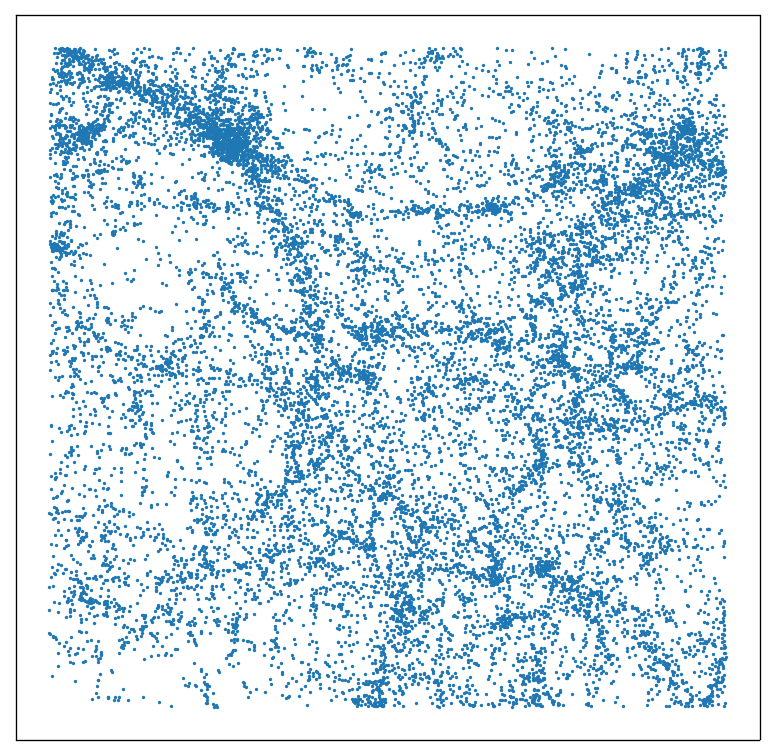

In [5]:
#--- Plot particle distribution
plt.figure(figsize=(8,8), dpi=120)
plt.xticks(())
plt.yticks(())

plt.scatter(xyz[:,0], xyz[:,1], s=1)
plt.show()

In [6]:
sdtfe.compute_sdtfe(xyz, 75000.0, 4, 'TEST_', gauss_scale=3)

>>>  14313  of  16860


In [7]:
for i in range(3):
    print(str(i))